Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:

   1. Vanilla logistic regression
   2. Ridge logistic regression
   3. Lasso logistic regression
   
In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?

## Data Cleaning

In [53]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
%matplotlib inline
sns.set_style('white')

In [64]:
df.head()

,population,violent_crime,murder_and_nonnegligent_manslaughter,rape_revised_definition1,rape_legacy_definition2,robbery,aggravated_assault,property_crime,burglary,larceny-theft,motor_vehicle_theft,arson3
City,,,,,,,,,,,,
Adams Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
Addison Town and Village,0.0,3.0,0.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
Akron Village,0.0,3.0,0.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
Albany,0.0,791.0,8.0,0.0,30.0,227.0,526.0,0.0,705.0,0.0,142.0,0.0
Albion Village,0.0,23.0,0.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,0.0


In [55]:
import pandas as pd
url = 'https://raw.githubusercontent.com/browsingATM/Thinkful/master/Unit%203/nyc_crime.csv'
df = pd.read_csv(url,index_col=0,parse_dates=[0])


In [56]:
#standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [57]:
df['population'] = pd.to_numeric(df['population'], errors='coerce')
df['violent_crime'] = pd.to_numeric(df['violent_crime'], errors='coerce')
df['murder_and_nonnegligent_manslaughter'] = pd.to_numeric(df['murder_and_nonnegligent_manslaughter'], errors='coerce')
df['rape_revised_definition1'] = pd.to_numeric(df['rape_revised_definition1'], errors='coerce')
df['rape_legacy_definition2'] = pd.to_numeric(df['rape_legacy_definition2'], errors='coerce')
df['robbery'] = pd.to_numeric(df['robbery'], errors='coerce')
df['aggravated_assault'] = pd.to_numeric(df['aggravated_assault'], errors='coerce')
df['property_crime'] = pd.to_numeric(df['property_crime'], errors='coerce')
df['burglary'] = pd.to_numeric(df['burglary'], errors='coerce')
df['larceny-theft'] = pd.to_numeric(df['larceny-theft'], errors='coerce')
df['motor_vehicle_theft'] = pd.to_numeric(df['motor_vehicle_theft'], errors='coerce')
df['arson3'] = pd.to_numeric(df['arson3'], errors='coerce')

In [58]:
df.replace(np.nan, 0, inplace=True) 

In [59]:
df.dtypes

population                              float64
violent_crime                           float64
murder_and_nonnegligent_manslaughter    float64
rape_revised_definition1                float64
rape_legacy_definition2                 float64
robbery                                 float64
aggravated_assault                      float64
property_crime                          float64
burglary                                float64
larceny-theft                           float64
motor_vehicle_theft                     float64
arson3                                  float64
dtype: object

## Features Engineering

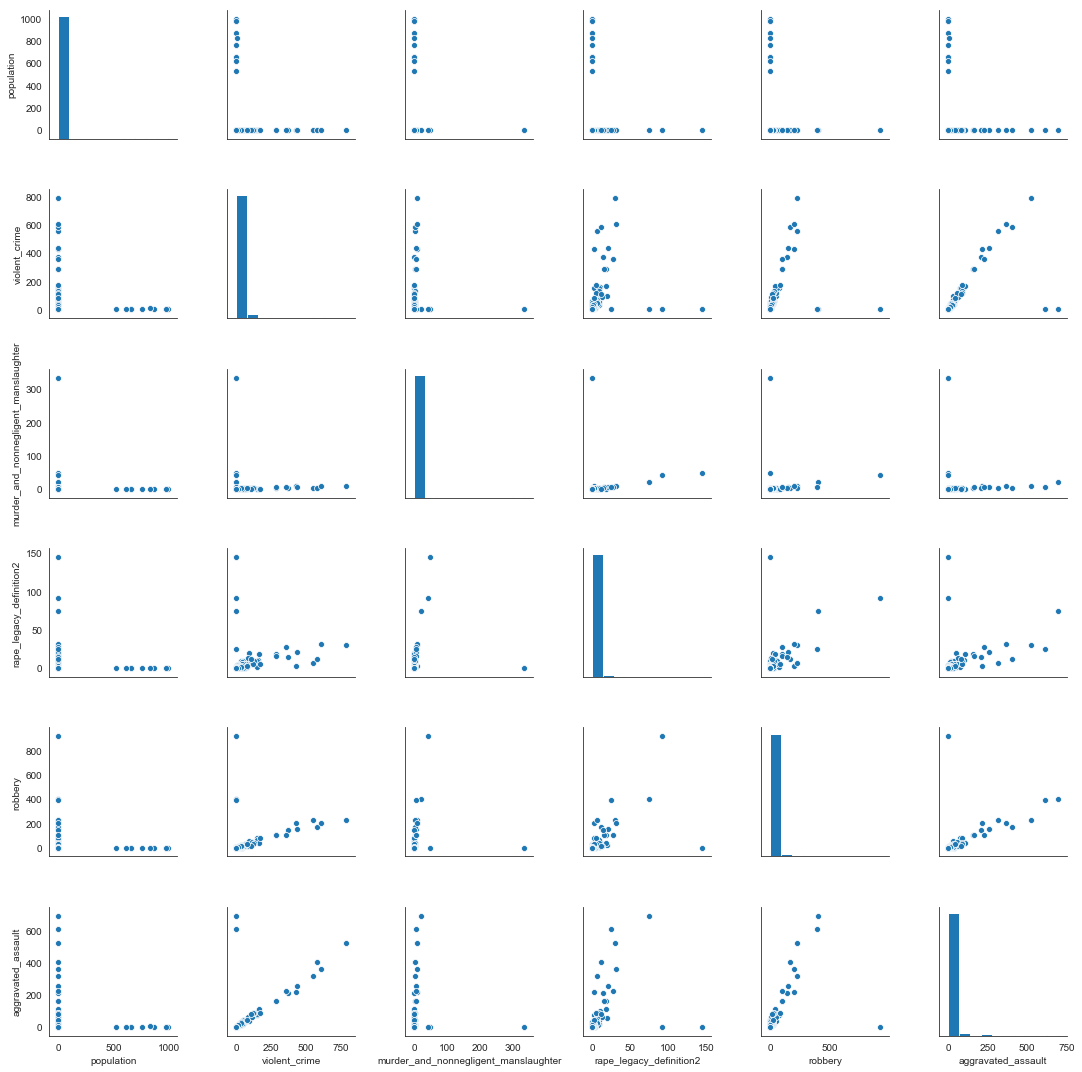

In [66]:
sns.pairplot(df, 
             vars = ['population', 'violent_crime', 'murder_and_nonnegligent_manslaughter',
                     'rape_legacy_definition2', 'robbery',
                    'aggravated_assault'])
#too big?

                                      population  violent_crime  \
population                              1.000000      -0.056146   
violent_crime                          -0.056146       1.000000   
murder_and_nonnegligent_manslaughter   -0.014306       0.023170   
rape_legacy_definition2                -0.041602       0.274162   
robbery                                -0.036688       0.423743   
aggravated_assault                     -0.049777       0.712495   

                                      murder_and_nonnegligent_manslaughter  \
population                                                       -0.014306   
violent_crime                                                     0.023170   
murder_and_nonnegligent_manslaughter                              1.000000   
rape_legacy_definition2                                           0.178340   
robbery                                                           0.126648   
aggravated_assault                                            

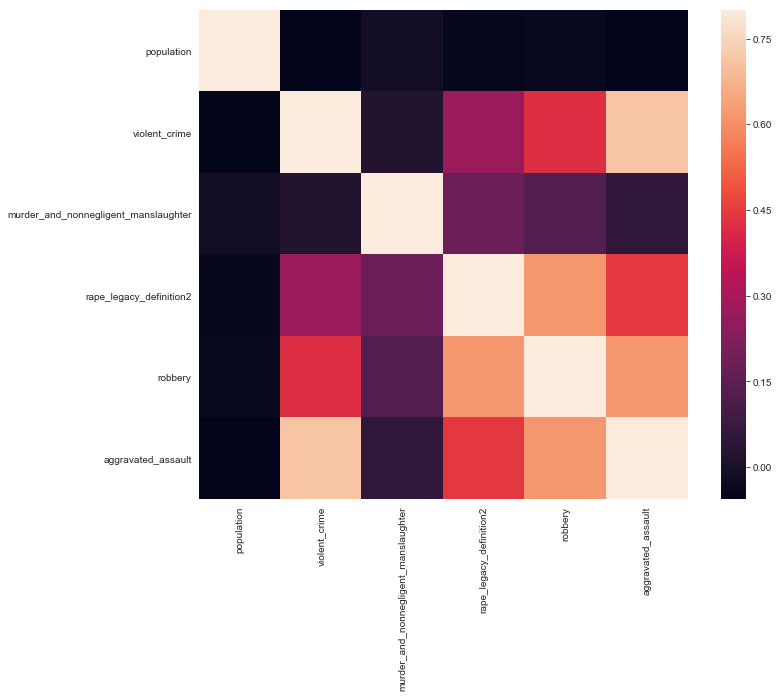

In [67]:
# Make a smaller df with the features I care about
df2 = df[['population', 'violent_crime', 'murder_and_nonnegligent_manslaughter',
                     'rape_legacy_definition2', 'robbery', 'aggravated_assault']].copy()

# Make the correlation matrix.
corrmat = df2.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Logistic Regression

In [62]:
# use np.where to turn x > 0 into a 1 for classification

In [69]:
lr = LogisticRegression(C=1e9)
y = df['violent_crime']
X = df[['aggravated_assault', 'robbery']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[ -1.45401065e-02   2.46498375e-02]
 [ -5.54779192e-01  -4.25505463e-01]
 [ -2.36359650e-01  -2.17148950e-01]
 [ -6.79910854e-02  -3.21591706e-01]
 [ -7.88697546e-02  -7.86549109e-02]
 [ -3.85944608e-02  -1.05957357e-01]
 [  2.00353929e-03  -2.10731867e-01]
 [  1.64229365e-02  -2.17307901e-01]
 [ -1.52545771e-02  -4.86670798e-02]
 [  5.94759310e-03  -8.53809043e-02]
 [  1.95864886e-04  -4.93816713e-02]
 [  6.60835505e-02  -3.08571371e-01]
 [ -2.73562024e-03  -1.78122776e-02]
 [  2.29891137e-02  -6.98342161e-02]
 [  8.65708170e-03  -3.72590479e-02]
 [  3.88591347e-02  -1.12139354e-01]
 [  1.13613595e-02  -3.73415115e-02]
 [  3.94623817e-02  -1.01109485e-01]
 [  5.78243672e-02  -1.52828995e-01]
 [  1.94573684e-02  -4.85057471e-02]
 [  1.03833096e-02  -2.61192739e-02]
 [  1.16637535e-02  -2.91656413e-02]
 [  3.82191349e-02  -8.90404779e-02]
 [  5.05228799e-02  -1.19202391e-01]
 [ -1.15638853e-03  -2.55354718e-03]
 [ -1.39423452e-03  -1.07126278e-03]
 [  5.65753327e-02  -1.32

/Users/jakegrosek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jakegrosek/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Ridge / L2 Regression

In [71]:
#training sets
regr1 = linear_model.LinearRegression()
Y_train = df['violent_crime']
X_train = df[['aggravated_assault', 'robbery']]
regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))


R-squared simple model:
0.508119829136


In [72]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

0.493759736367
0.907754006059


## Lasso / L1 Regression

In [73]:
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

R² for the model with few features:
0.508119808834

Parameter estimates for the model with few features:
[  0.86956498  -0.03649472  10.59773698]
